In [27]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

from rerf.urerf import UnsupervisedRandomForest

In [28]:
# Load dataset
iris = datasets.load_iris()

In [29]:
#Crate an object 
X = iris.data

In [30]:
clf = UnsupervisedRandomForest(feature_combinations='auto', max_depth=None,
                         max_features='auto', min_samples_split='auto',
                         n_estimators=1000, n_jobs=None,
                         projection_matrix='RerF', random_state=0)
print(clf)

UnsupervisedRandomForest(feature_combinations='auto', max_depth=None,
                         max_features='auto', min_samples_split='auto',
                         n_estimators=1000, n_jobs=None,
                         projection_matrix='RerF', random_state=0)


[[1.    0.082 0.071 ... 0.    0.    0.   ]
 [0.077 1.    0.185 ... 0.001 0.    0.001]
 [0.055 0.192 1.    ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 1.    0.066 0.106]
 [0.    0.    0.    ... 0.052 1.    0.02 ]
 [0.    0.001 0.    ... 0.104 0.013 1.   ]]


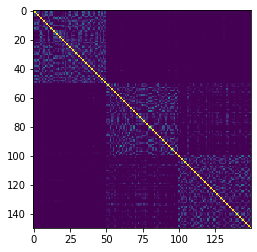

In [31]:
clf.fit(X)
sim_mat = clf.transform()
print(sim_mat)
plt.imshow(sim_mat)

In [33]:
cluster = KMeans(n_clusters=3)
predict_labels = cluster.fit_predict(sim_mat)
score = adjusted_rand_score(iris.target, predict_labels)

print("labels\n", iris.target)
print("predict\n", predict_labels)
print("Adjusted Rand Score:", score)

labels
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
predict
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 2 0 0
 2 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
Adjusted Rand Score: 0.7195837484778037


In [54]:
from sklearn.cluster import AffinityPropagation

#iris = datasets.load_iris()
#X = iris.data
clf = UnsupervisedRandomForest(feature_combinations='auto', max_depth=None,
                         max_features='auto', min_samples_split='auto',
                         n_estimators=1000, n_jobs=None,
                         projection_matrix='RerF', random_state=0)
clf.fit(X)
#sim_mat = clf.transform()
#print(sim_mat)
#plt.imshow(sim_mat)

cluster = AffinityPropagation(preference= -20)
predict_labels = cluster.fit_predict(sim_mat)
score = adjusted_rand_score(iris.target, predict_labels)

print("labels\n", iris.target)
print("predict\n", predict_labels)
print("Adjusted Rand Score:", score)


labels
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
predict
 [1 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 1
 1 0 1 1 0 0 1 1 0 1 0 1 1 3 3 3 2 3 3 3 2 3 2 2 3 2 3 2 3 3 2 3 2 3 3 3 3
 3 3 3 3 3 2 2 2 2 3 3 3 3 3 3 2 2 3 2 2 2 3 3 3 2 2 4 3 4 4 4 4 2 4 4 4 4
 4 4 3 4 4 4 4 4 3 4 3 4 3 4 4 3 3 4 4 4 4 4 3 3 4 4 4 3 4 4 4 3 4 4 4 3 4
 4 3]
Adjusted Rand Score: 0.532611742254823


In [78]:
from sklearn.cluster import MeanShift

#iris = datasets.load_iris()
#X = iris.data
#clf = UnsupervisedRandomForest(feature_combinations='auto', max_depth=None,
                        # max_features='auto', min_samples_split='auto',
                         #n_estimators=1000, n_jobs=None,
                         #projection_matrix='RerF', random_state=0)
#clf.fit(X)
#sim_mat = clf.transform()
#print(sim_mat)
#plt.imshow(sim_mat)


cluster = MeanShift(bandwidth = 1.1)
predict_labels = cluster.fit_predict(sim_mat)
score = adjusted_rand_score(iris.target, predict_labels)

print("labels\n", iris.target)
print("predict\n", predict_labels)
print("Adjusted Rand Score:", score)

labels
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
predict
 [11  3  9  3  9  0 13  9  3  3  0  9  3  3  0  0  0  0  0  0  0  0 12  0
  0  3  0  0 11  3  3  0  0  0  3  9 11 12  3  0 13  3 12  0  0  3  0  9
  0  9  2  2 15  1  2  1 17  1  2  1 20  2 20  2  1  2  2  1 21  1 17 18
 21  2  2  2  2 15  2  1  1  1  1 22  2 17  2 20  1  1  1  2  1 20  1  1
  1  2  1  1  5  6  4  8  4  4 14  4 19  7  5  6 16  6  6  5  8  7  4 21
  5  6  4  6  5  4  6  6 10  4  4  7 10  2 21  4  5  8  6  4  5  5  6  5
  5 16  6 16  5  6]
Adjusted Rand Score: 0.2871318708579934


In [76]:
from sklearn.cluster import SpectralClustering 

#iris = datasets.load_iris()
#X = iris.data
clf = UnsupervisedRandomForest(feature_combinations='auto', max_depth=None,
                         max_features='auto', min_samples_split='auto',
                         n_estimators=1000, n_jobs=None,
                         projection_matrix='RerF', random_state=0)
clf.fit(X)
sim_mat = clf.transform()
#print(sim_mat)
#plt.imshow(sim_mat)

cluster = SpectralClustering(epsilon = 0.3)
predict_labels = cluster.fit_predict(sim_mat)
score = adjusted_rand_score(iris.target, predict_labels)

print("labels\n", iris.target)
print("predict\n", predict_labels)
print("Adjusted Rand Score:", score)

TypeError: __init__() got an unexpected keyword argument 'epsilon'

In [74]:
from sklearn.cluster import SpectralClustering 